<a href="https://colab.research.google.com/github/sanazgit/Machin-Learning/blob/main/MultiClassProblem_OVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# **OVO_Class**

With this class, we have implemented one vs one algorithm as the data set demands a multi-classification mode!

The description of the functions is expressed in the body class.

In [ ]:
class OVO_MultiClass(object):

  def __init__(self, alpha=0.01, n_iteration=100):  #This function intializes the alpha value and iteration 
    self.alpha = alpha                            #value in the object
    self.n_iter = n_iteration
        
  def _sigmoid_function(self, x): #This function is resonsible for calculating the sigmoid value with given parameter
    value = 1 / (1 + np.exp(-x))
    return value
  def _cost_function(self,h,theta, y): # The fuctions calculates the cost value
    m = len(y)
    cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
    return cost
    
  def _gradient_descent(self,X,h,theta,y,m):  # This function calculates the theta value by gradient descent
    gradient_value = np.dot(X.T, (h - y)) / m
    theta -= self.alpha * gradient_value
    return theta
    
  def fit(self, X, y): #This function primarily calculates the optimal theta value using which we predict the future data

    print("Fitting the given dataset..")
    self.theta = []
    self.cost = []
    self.K=[]

    X = np.insert(X, 0, 1, axis=1)
    self.K = np.unique(y)   # number of classes
    m= len(y)
   
    for k in self.K:
      for j in range(2,len(self.K)+1):
        if k!=j and k < j:
          y_kj = (np.where(y == k, 1, 0)) + (np.where(y == j, -1, 0))
          theta = np.zeros(X.shape[1])
          theta= np.linalg.pinv(X).dot(y_kj)

          cost = []

          for _ in range(self.n_iter):
            z = X.dot(theta)
            h = self._sigmoid_function(z)
            theta = self._gradient_descent(X,h,theta,y_kj,m)
            cost.append(self._cost_function(h,theta,y_kj))
          self.theta.append((theta, k,j))
          self.cost.append((cost,k,j))

    return self

  def predict(self, X): # this function calls the max predict function to classify the individul feauter
    X = np.insert(X, 0, 1, axis=1)
    prob_list= []
    X_predicted=[]

        #whichClass=[]
        #p= [(sum(self._sigmoid_function(data.dot(theta))) for k in self.K for theta, c1,c2 in self.theta if k== c1 for data in X]

    for data in X:
      for k in self.K:
        p1_sum=0
        p2_sum=0
        for j in range(1,len(self.K)+1):
          if k !=j:
            for t,c1,c2 in self.theta:
              if k==c1 and j == c2:
                p1= self._sigmoid_function(data.dot(t))
                p1_sum += p1
              if k == c2 and j==c1 :
                p1= self._sigmoid_function(data.dot(t))
                p2= 1 - p1   
                p2_sum += p2
                
        sum_num= p1_sum + p2_sum        
        prob_list.append((sum_num,k))
              
      X_predicted.append(max(prob_list)[1])

    return X_predicted

  def score(self,X, y): #This function compares the predictd label with the actual label to find the model performance
    score = sum(self.predict(X) == y) / len(y)
    return score    
    
  def _plot_cost(self,costh): # This function plot the Cost function value
    for cost,c,k in costh:
      plt.plot(range(len(cost)),cost,'r')
      plt.title("Convergence Graph of Cost Function of type-" + str(c) + "-" + str(k))
      plt.xlabel("Number of Iterations")
      plt.ylabel("Cost")
      plt.show()

# **Read Data**

In [ ]:
# Read train data
data= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML_Exercises/MultiClass_problem_train.xlsx')
data

,x1,x2,y
0,0.837747,0.676387,1
1,1.295292,0.793018,1
2,0.810387,0.858808,1
3,0.722597,0.942760,1
4,0.788612,1.213929,1
...,...,...,...
3995,1.930744,1.739438,4
3996,1.648980,2.044412,4
3997,1.862512,1.549823,4
3998,1.933452,1.966226,4


# **Pre-processing of input data**

In [ ]:
y_train = data['y'].values  #segregating the label vlue from the feature value.
X_train = data.drop(['y'],axis=1).values
X_train

array([[0.83774656, 0.67638741],
       [1.29529151, 0.79301754],
       [0.81038668, 0.85880804],
       ...,
       [1.86251242, 1.5498227 ],
       [1.93345221, 1.96622559],
       [1.61655592, 1.8752228 ]])

# **Scatter Plot**

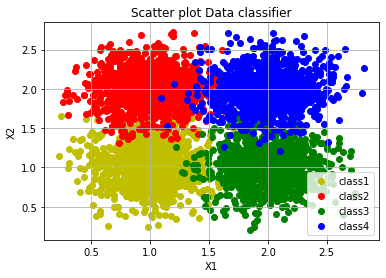

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()


ax.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1], c='y',label="class1")
ax.scatter(X_train[:,0][y_train==2],X_train[:,1][y_train==2], c='r',label="class2")
ax.scatter(X_train[:,0][y_train==3],X_train[:,1][y_train==3], c='g',label="class3")
ax.scatter(X_train[:,0][y_train==4],X_train[:,1][y_train==4], c='b',label="class4")

ax.set_title('Scatter plot Data classifier')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.grid()
plt.show()

# **Read Test data**

In [ ]:
# Read test data
data_test= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML_Exercises/MultiClass_Problem_Test.xlsx')

y_test = data_test['y'].values  #segregating the label vlue from the feature value.
X_test = data_test.drop(['y'],axis=1).values

# **Plot2 ---> Accuracy and cost Function**

Fitting the given dataset..
the accuracy of the model is  0.74225
Fitting the given dataset..
the accuracy of the model is  0.74225
Fitting the given dataset..
the accuracy of the model is  0.74225
Fitting the given dataset..
the accuracy of the model is  0.74225
Fitting the given dataset..
the accuracy of the model is  0.74225
0.74225


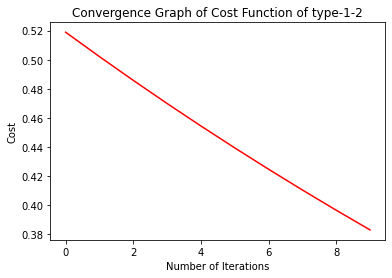

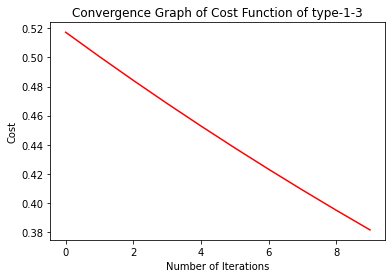

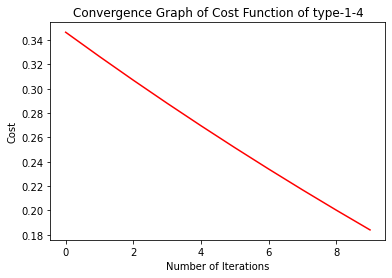

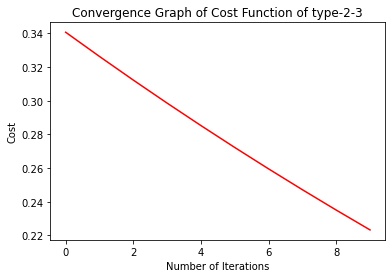

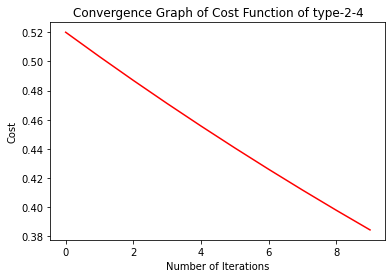

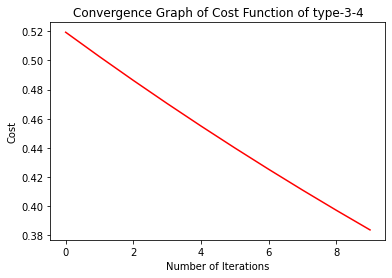

In [ ]:
scores=[]

for _ in range (5):
  lovo = OVO_MultiClass(n_iteration=10).fit(X_train, y_train)
  predition1 = lovo.predict(X_test)
  score1 = lovo.score(X_test,y_test)
  print("the accuracy of the model is ",score1)
  scores.append(score1)
    
print(np.mean(scores))
lovo._plot_cost(lovo.cost)

In [ ]:
lovo.theta

[(array([ 1.17772726, -0.07398338, -0.89736506]), 1, 2),
 (array([ 1.15316189, -0.89117712, -0.07232955]), 1, 3),
 (array([ 2.36714037, -0.88922835, -0.89821528]), 1, 4),
 (array([-0.07184928, -0.88772885,  0.75426814]), 2, 3),
 (array([ 1.14236528, -0.88488652, -0.07122247]), 2, 4),
 (array([ 1.16692879, -0.06769734, -0.8962604 ]), 3, 4)]

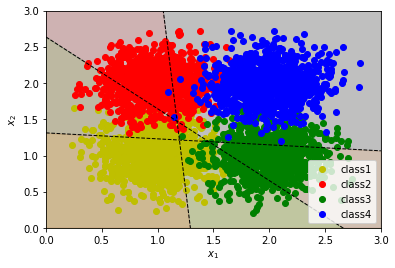

In [ ]:
wc1= lovo.theta[0][0]
wc2= lovo.theta[1][0]
wc3= lovo.theta[2][0]


# intercepts
b1= wc1[0]
b2= wc2[0]
b3= wc3[0]

# slops
w11= wc1[1] ; w12= wc1[2] 
w21= wc2[1] ; w22= wc2[2]
w31= wc3[1] ; w32= wc3[2]

xmin, xmax = 0.0, 3
ymin, ymax = 0.0, 3


c1 = -b1/w12
m1 = -w11/w12

c2 = -b2/w22
m2 = -w21/w22

c3 = -b3/w32
m3 = -w31/w32

xd = np.array([xmin, xmax])
yd1 = m1*xd + c1
plt.plot(xd, yd1, 'k', lw=1, ls='--')
plt.fill_between(xd, yd1, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd1, ymax, color='tab:gray', alpha=0.2)

yd2 = m2*xd + c2
plt.plot(xd, yd2, 'k', lw=1, ls='--')
plt.fill_between(xd, yd2, ymin, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd2, ymax, color='tab:gray', alpha=0.2)

yd3 = m3*xd + c3
plt.plot(xd, yd3, 'k', lw=1, ls='--')
plt.fill_between(xd, yd3, ymin, color='tab:green', alpha=0.2)
plt.fill_between(xd, yd3, ymax, color='tab:gray', alpha=0.2)


plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1], c='y',label="class1")
plt.scatter(X_train[:,0][y_train==2],X_train[:,1][y_train==2], c='r',label="class2")
plt.scatter(X_train[:,0][y_train==3],X_train[:,1][y_train==3], c='g',label="class3")
plt.scatter(X_train[:,0][y_train==4],X_train[:,1][y_train==4], c='b',label="class4")


plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.legend()

plt.show()